In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("./PRDTF_202309111120529371.csv", encoding='cp949')
df.head()

,TRDAR_NO,TRDAR_NM,SIGNGU_CD,SIGNGU_NM,LINK_CNT,MINM_TXTR,MAX_TXTR,AVE_TXTR
0,9138,공덕역_1,11440,마포구,49,75.5,1674.8,548.5
1,9139,공덕역_2,11440,마포구,61,7.1,1674.8,413.2
2,9140,디지털미디어시티,11440,마포구,84,36.3,671.7,210.9
3,9141,마포역_1,11440,마포구,55,52.3,1967.3,546.0
4,9142,마포역_2,11440,마포구,83,12.6,1967.3,377.7


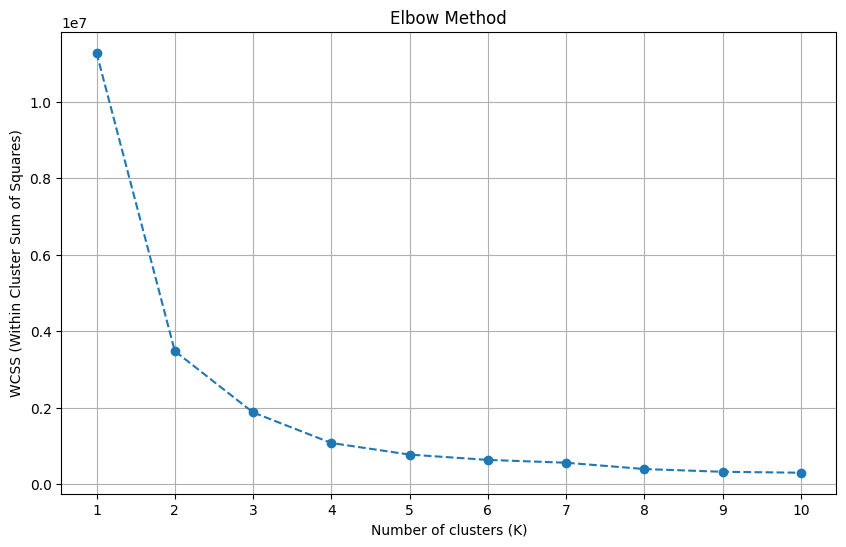

In [17]:
from sklearn.cluster import KMeans

# 최대 클러스터 수 설정
max_clusters = 10
wcss = []

# K 값을 1부터 최대 클러스터 수까지 변경하면서 WCSS 값을 계산
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['LINK_CNT', 'AVE_TXTR']])
    wcss.append(kmeans.inertia_)

# WCSS 값을 그래프로 나타내기
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

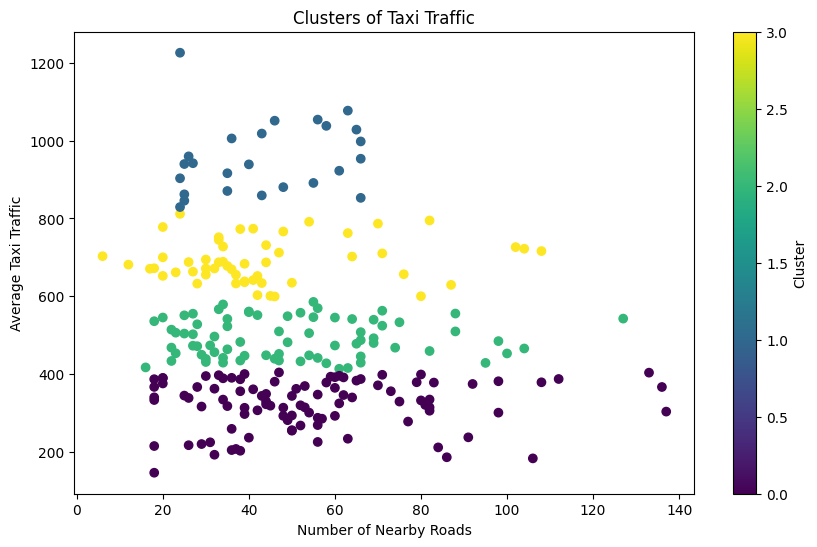

In [18]:
# 결정된 K 값으로 K-means 알고리즘을 초기화하고 클러스터링을 수행
k = 4 
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(df[['LINK_CNT', 'AVE_TXTR']])
labels = kmeans.labels_

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['LINK_CNT'], df['AVE_TXTR'], c=labels, cmap='viridis')
plt.title('Clusters of Taxi Traffic')
plt.xlabel('Number of Nearby Roads')
plt.ylabel('Average Taxi Traffic')
plt.colorbar(label='Cluster')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
silhouette_avg = silhouette_score(df[['LINK_CNT','AVE_TXTR']], labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5213581269681632
